# Phase 1 Project

<img src = './Airplane.jpeg' style=width:480px;height:200px>

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)## Business Understanding

**which aircraft has the lowest risk for a company to start a new business endeavor with?**

Selecting the right aircraft to start a business is a crucial decision, as choosing an aircraft with a high risk profile can result in operational disruptions, financial losses, and reputational damage. Therefore, it is essential to which aircraft are likely to pose the lowest risk for purchase.

in this analysis we will be looking at previous aricrafts accidents to be able to make reccomandations on which aircrafts carry the  lowest risk

### Main Objective

* Find Which aircraft carries the lowest risk when purchased

## Data Understanding

The Data that was used for this analysis will be pulled from one file 

`aviaitonData.csv`

* **Source**: This dataset can be found in [`kaggle`](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) which is a platform with thousands of datasets from all sorts of topics 
* **Contents**: The Data conatns various columns of diffrent information about the aircafts involved in the accident and the locations involved 
* **Format**: The data is stored in a csv file (comma separated value )

First we import the relevant libaries needed for the analysis

In [412]:
# import all relevant libraries need fot analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read the relevant dataset need for analysis

In [414]:
# read the CSV file
df = pd.read_csv('./AviationData 2.csv')


## Data Exploration

We will have to look at various aspects of the dataset to have a better understaning of it to see what can help us in the analysis

First thing is to find number of rows and columns in the dataset 

In [417]:
#Finding out how many rows and columns there are in the dataset before cleaning
df.shape
print("Number of rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of rows:  88889
Number of Columns:  31


we then preview the top and the bottom of the dataset 

In [419]:
# looking at the last 5 rows of the data set 
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30/12/2022


In [420]:
#looking at the first 5 rows of the data set
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


we then need to find out the information about the data set to check if any columns contain null values and if the data types are what want them to be 

In [422]:
#fining out the ifnormation of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

As shown above we can observe that many columns contain null values and some of the columns datatypes will have to be chamged later on 

## Data Wrangling

### Consintancy

In [426]:
#creating a list of of columns that need to be dropped 
columns_to_drop = [
    'Investigation.Type', 'Accident.Number',
    'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
    'Airport.Name', 'Registration.Number', 'Schedule', 'Air.carrier', 'Purpose.of.flight',
    'Amateur.Built','Injury.Severity','Weather.Condition','FAR.Description','Publication.Date','Report.Status'
]
#dropping the columns
df = df.drop(columns=columns_to_drop)

The above columns were dropped since they contain infromation that is irrelevant, redundant or unnecessary  not needed in the analysis process

#### Duplicates

It is important to remove duplicates to maintain data quality and consitency during analysis 

In [430]:
#Checking for duplicates 
df.duplicated().sum()

34

As seen above there is 103 rows of duplicates which need to be dropped

In [432]:
#dropping the duplicates
df =df.drop_duplicates()
df.duplicated().sum()

0

The `Make` Column may need to be investigated for cassing issues

In [434]:
#lisiting the uniwue make rows and number of times they appear
df['Make'].value_counts()

Make
Cessna             22220
Piper              12028
CESSNA              4920
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

### Completeness

As seen above in the `Make` column there seems to be some inconsitency in the casing in the values which may make our analysis inaccurate

In [437]:
#converting all Make values to lower case
df["Make"] = df["Make"].str.lower()

Finding and dealing with rows with null values in nessesery for proper analysis

In [439]:
#finding out the number of duplicates each column has 
df.isna().sum()

Event.Id                      0
Event.Date                    0
Aircraft.damage            3191
Aircraft.Category         56577
Make                         63
Model                        92
Number.of.Engines          6081
Engine.Type                7094
Total.Fatal.Injuries      11398
Total.Serious.Injuries    12503
Total.Minor.Injuries      11926
Total.Uninjured            5908
Broad.phase.of.flight     27160
dtype: int64

In [440]:
#finding out the percentage of duplicates each column has 
df.isna().mean()*100

Event.Id                   0.000000
Event.Date                 0.000000
Aircraft.damage            3.591244
Aircraft.Category         63.673400
Make                       0.070902
Model                      0.103539
Number.of.Engines          6.843734
Engine.Type                7.983794
Total.Fatal.Injuries      12.827641
Total.Serious.Injuries    14.071240
Total.Minor.Injuries      13.421867
Total.Uninjured            6.649035
Broad.phase.of.flight     30.566654
dtype: float64

As seen above most rows contain null values

espesially in the `Aircraft.category` column where it will not be advisable to drop the rows since the percentage of null rows is very significant and the columns should not be dropped since the information is relevant to the analysis the best path to take in this situation is to use the mode to fill in the null values since both columns are categorical data and the mode value appears more than 70% of the time

In [442]:
df['Aircraft.Category'].value_counts().mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of Aircraft.Category
Airplane             27610
Helicopter            3438
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64>

In [443]:
df['Aircraft.Category'].fillna(df['Aircraft.Category'].mode()[0], inplace=True)


The null values in `Aircarft.damage`,`Make`,`Model`,`Broad.phase.of.flight` will be replaced with unknown which allows us to keep most of the information without keeping null values

In [445]:
df['Aircraft.damage'].replace({np.nan: 'Unknown'}, inplace=True)
df['Make'].replace({np.nan: 'Unknown'}, inplace=True)
df['Model'].replace({np.nan: 'Unknown'}, inplace=True)
df['Broad.phase.of.flight'].replace({np.nan: 'UNKNOWN'}, inplace=True)

The null values in columns`Total.Fatal.Injuries`,`Total.minor.Injuries`,`Total.serious.Injuries`,`Total.uninjured.Injuries`will be replaced with 0 value which allows as to perform calculations 

In [447]:
df['Total.Fatal.Injuries'].replace({np.nan: 0}, inplace=True)
df['Total.Serious.Injuries'].replace({np.nan: 0}, inplace=True)
df['Total.Minor.Injuries'].replace({np.nan: 0}, inplace=True)
df['Total.Uninjured'].replace({np.nan: 0}, inplace=True)

The rest of the Null values will then be dropped since there few in number and will not have an effect on the final analysis

In [449]:
df = df.dropna()

In [450]:
df.isna().mean()*100

Event.Id                  0.0
Event.Date                0.0
Aircraft.damage           0.0
Aircraft.Category         0.0
Make                      0.0
Model                     0.0
Number.of.Engines         0.0
Engine.Type               0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Broad.phase.of.flight     0.0
dtype: float64

As seen eariler columns like `Event.Date`  may need their data types changed to the `datetime` data type for later  analysis

In [454]:
#changeing Event.Date to Datetime datatype
df['Event.Date'] = pd.to_datetime(df['Event.Date'], dayfirst=True)
#Checking if changes are made
df['Event.Date'].head()

0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
5   1979-09-17
Name: Event.Date, dtype: datetime64[ns]

#### Adding New Columns

Adding a `Year`  and `Total.injuries` columns which will allow us to perform yearly analysis and calculations later on 

In [455]:
#creating a new column for Total injuries for easier anlysis
df["Total.Injuries"] = (df["Total.Fatal.Injuries"]+df["Total.Minor.Injuries"]+df["Total.Serious.Injuries"])

In [458]:
df['Year'] = df['Event.Date'].dt.year

In [ ]:
df["Year"].head()

filtering the data to accidents to 1982 and ahead since the years before dont have as many accidents and might interfear with the final analysis

In [497]:
df = df[df['Year']>=1982]

## Data Analysis

**Now that the data has been cleaned and validated it is time for analysing the data which will be doen in three steps**

### Univariate Analysis


In [464]:
df['Make'].value_counts().head(5)

Make
cessna    25652
piper     14075
beech      4970
bell       2366
boeing     1536
Name: count, dtype: int64

In [465]:
def get_make(make):
    
    if make in ['cessna','piper','beech', 'bell']:
        return make 
    else:
        return 'OTHER'

In [466]:
df['Make.simplified'] = df['Make'].apply(get_make)

<Figure size 1400x600 with 0 Axes>

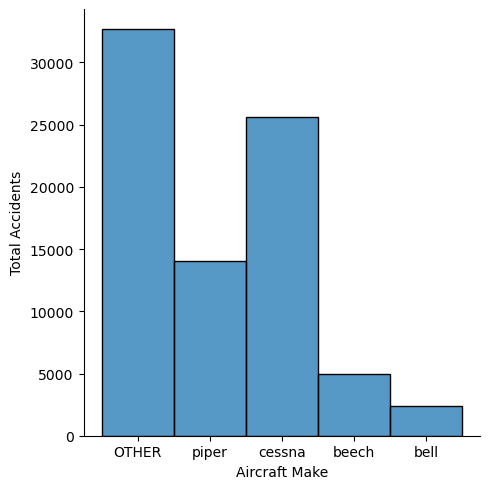

In [467]:
plt.figure(figsize=(14, 6))
ax = sns.displot(df['Make.simplified'])
ax.set_xlabels('Aircraft Make')
ax.set_ylabels('Total Accidents');

In [468]:
def category(purpose):
    if purpose == 'Airplane':
        return 'Airplane'
    
    else:
        return 'other'

In [469]:
df['Aircraft.Category.simple'] =df['Aircraft.Category'].apply(category)

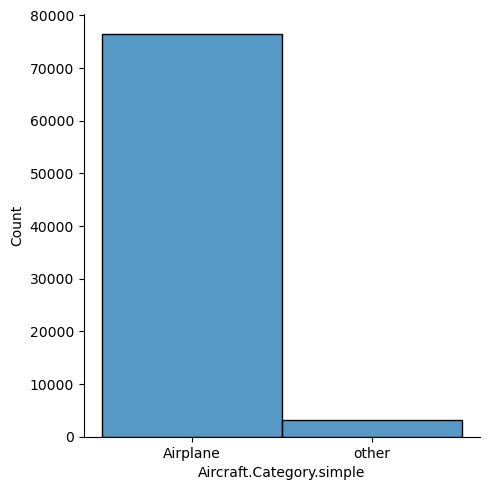

In [470]:
sns.displot(df['Aircraft.Category.simple'])
ax.set_xlabels('Aircraft Category')
ax.set_ylabels('Total Accidents');

In [471]:
def get_model(model):
    
    if model in ['152','172','172N', 'PA-28-140', '150','172M','172P','180','182','150M']:
        return model 
    

In [472]:
df['Model.simple'] =df['Model'].apply(get_model)  

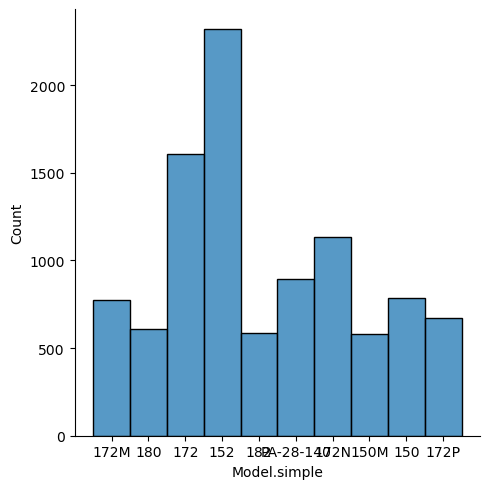

In [473]:
sns.displot(df['Model.simple'])
ax.set_xlabels('Aircraft Category')
ax.set_ylabels('Total Accidents');

In [474]:
df['Engine.Type'].value_counts().head()


Engine.Type
Reciprocating    69004
Turbo Shaft       3528
Turbo Prop        3324
Turbo Fan         2376
Unknown            772
Name: count, dtype: int64

In [475]:
def get_engine(engine):
    
    if engine in ['Reciprocating','Turbo Shaft','Turbo Prop','Turbo fan','Unknown' ]:
        return engine 

In [476]:
df['Engine.Type.simple'] = df['Engine.Type'].apply(get_engine)

''

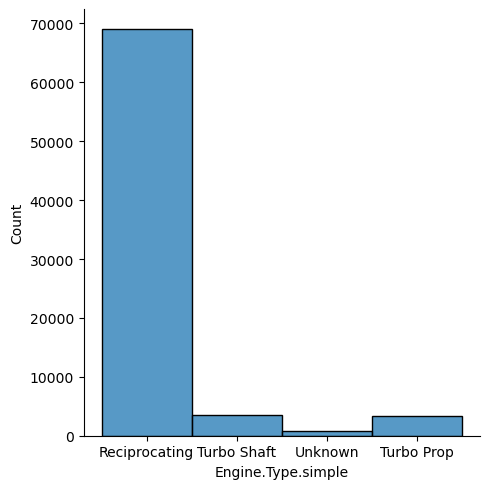

In [477]:
sns.displot(df['Engine.Type.simple'])
ax.set_xlabels('Aircraft Category')
ax.set_ylabels('Total Accidents')
;


### Bivariate Analysis


In this step of the analysis the goal will be to look at how two variables interact with eachother

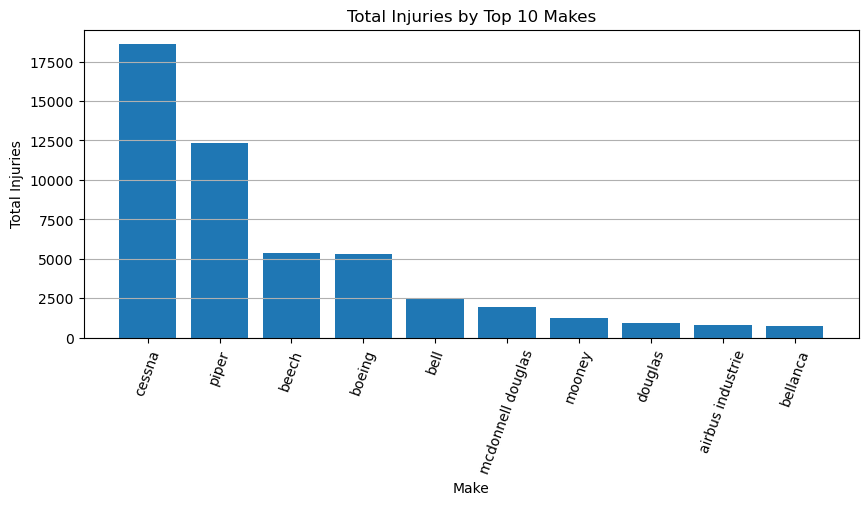

In [487]:
# Group the data by Make and calculate the sum of Total.Fatal.Injuries for each Make
fatal_injuries_by_make = df.groupby('Make')['Total.Injuries'].sum()

fig, ax = plt.subplots( figsize=(10,4))
# Convert the groupby result to a DataFrame for easier sorting
fatal_injuries_by_make = fatal_injuries_by_make.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_makes = fatal_injuries_by_make.sort_values(by='Total.Injuries', ascending=False).head(10)


#create the bar chart 
ax.bar(top_10_makes['Make'], top_10_makes['Total.Injuries'])
ax.set_title('Total Injuries by Top 10 Makes')
ax.set_xlabel('Make')
ax.set_ylabel('Total Injuries')
ax.set_xticklabels(top_10_makes['Make'],rotation=70)
ax.grid(axis='y') ;


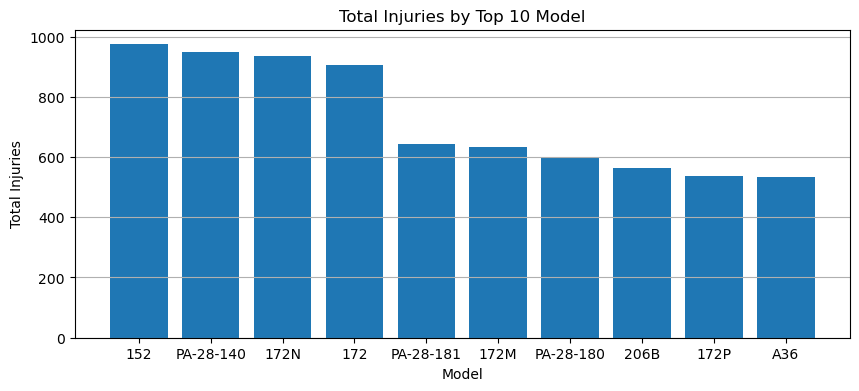

In [519]:
# Group the data by Make and calculate the sum of Total.Fatal.Injuries for each Make
fatal_injuries_by_model = df.groupby('Model')['Total.Injuries'].sum()

fig, ax = plt.subplots( figsize=(10,4))
# Convert the groupby result to a DataFrame for easier sorting
fatal_injuries_by_model = fatal_injuries_by_model.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_model = fatal_injuries_by_model.sort_values(by='Total.Injuries', ascending=False).head(10)


#create the bar chart 
ax.bar(top_10_model['Model'], top_10_model['Total.Injuries'])
ax.set_title('Total Injuries by Top 10 Model')
ax.set_xlabel('Model')
ax.set_ylabel('Total Injuries')
ax.grid(axis='y') ;

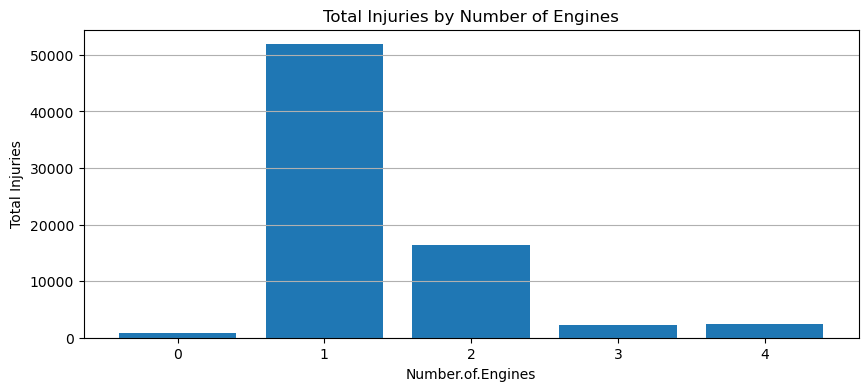

In [491]:
# Group the data by Make and calculate the sum of Total.Fatal.Injuries for each Make
fatal_injuries_by_no_engines = df.groupby('Number.of.Engines')['Total.Injuries'].sum()

fig, ax = plt.subplots( figsize=(10,4))
# Convert the groupby result to a DataFrame for easier sorting
fatal_injuries_by_no_engines = fatal_injuries_by_no_engines.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_engines = fatal_injuries_by_no_engines.sort_values(by='Total.Injuries', ascending=False).head()


#create the bar chart 
ax.bar(top_10_engines['Number.of.Engines'], top_10_engines['Total.Injuries'])
ax.set_title('Total Injuries by Number of Engines')
ax.set_xlabel('Number.of.Engines')
ax.set_ylabel('Total Injuries')
ax.grid(axis='y') ;

''

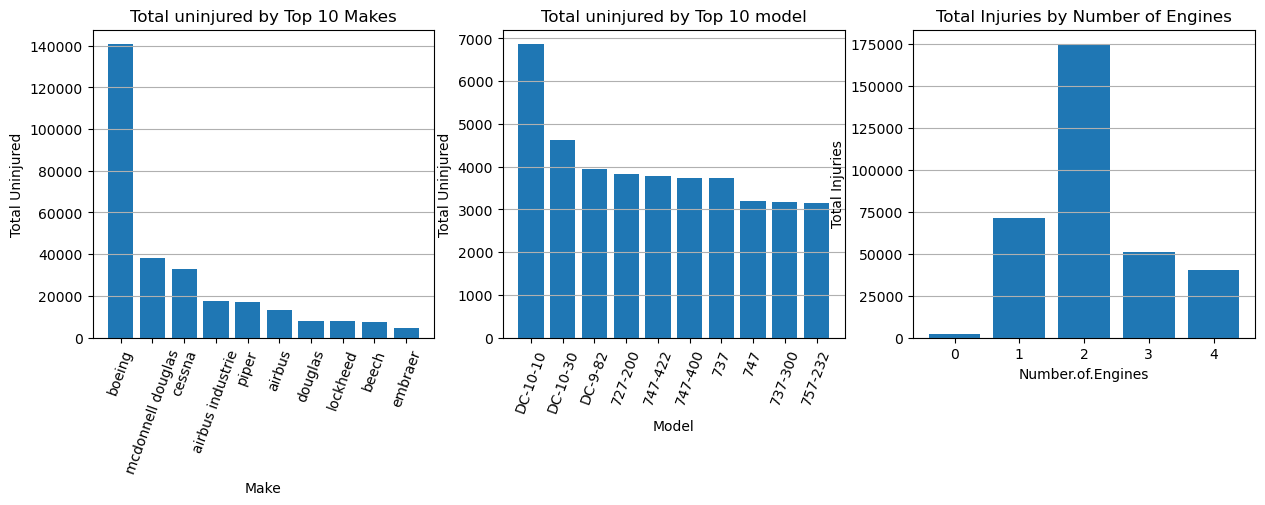

In [564]:
# Group the data by Make and calculate the sum of Total.Fatal.Injuries for each Make
fatal_uninjured_by_make = df.groupby('Make')['Total.Uninjured'].sum()

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))
# Convert the groupby result to a DataFrame for easier sorting
fatal_uninjured_by_make = fatal_uninjured_by_make.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_makes_uninjured = fatal_uninjured_by_make.sort_values(by='Total.Uninjured', ascending=False).head(10)


#create the bar chart 
ax1.bar(top_10_makes_uninjured['Make'], top_10_makes_uninjured['Total.Uninjured'])
ax1.set_title('Total uninjured by Top 10 Makes')
ax1.set_xlabel('Make')
ax1.set_ylabel('Total Uninjured')
ax1.set_xticklabels(top_10_makes_uninjured['Make'],rotation=70)
ax1.grid(axis='y') 

# Group the data by Make and calculate the sum of Total.Fatal.Injuries for each Make
fatal_uninjured_by_model = df.groupby('Model')['Total.Uninjured'].sum()

# Convert the groupby result to a DataFrame for easier sorting
fatal_uninjured_by_model = fatal_uninjured_by_model.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_model_uninjured = fatal_uninjured_by_model.sort_values(by='Total.Uninjured', ascending=False).head(10)

ax2.bar(top_10_model_uninjured['Model'], top_10_model_uninjured['Total.Uninjured'])
ax2.set_title('Total uninjured by Top 10 model')
ax2.set_xlabel('Model')
ax2.set_ylabel('Total Uninjured')
ax2.set_xticklabels(top_10_model_uninjured['Model'],rotation=70)
ax2.grid(axis='y') 


# Group the data by Make and calculate the sum of Total.Fatal.Injuries for each Make
uninjured_by_no_engines = df.groupby('Number.of.Engines')['Total.Uninjured'].sum()

# Convert the groupby result to a DataFrame for easier sorting
uninjured_by_no_engines = uninjured_by_no_engines.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_engines_uninjured = uninjured_by_no_engines.sort_values(by='Total.Uninjured', ascending=False).head()


#create the bar chart 
ax3.bar(top_10_engines_uninjured['Number.of.Engines'], top_10_engines_uninjured['Total.Uninjured'])
ax3.set_title('Total Injuries by Number of Engines')
ax3.set_xlabel('Number.of.Engines')
ax3.set_ylabel('Total Injuries')
ax3.grid(axis='y') ;
;


In [ ]:
fig, ax = plt.subplots( figsize=(10,4))

fatal_uninjured_by_model = df.groupby('Model')['Total.Uninjured'].sum()

# Convert the groupby result to a DataFrame for easier sorting
fatal_uninjured_by_model = fatal_uninjured_by_model.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_model_uninjured = fatal_uninjured_by_model.sort_values(by='Total.Uninjured', ascending=False).head(10)

ax.bar(top_10_model_uninjured['Model'], top_10_model_uninjured['Total.Uninjured'])
ax.set_title('Total uninjured by Top 10 model')
ax.set_xlabel('Model')
ax.set_ylabel('Total Uninjured')
ax.set_xticklabels(top_10_model_uninjured['Model'],rotation=70)
ax.grid(axis='y') 

;


In [499]:
accidents_year = df.groupby(['Year'])["Event.Id"].count().reset_index(name="Number of Accidents")
accidents_year.head()

,Year,Number of Accidents
0,1982,3590
1,1983,3496
2,1984,3408
3,1985,3061
4,1986,2823


''

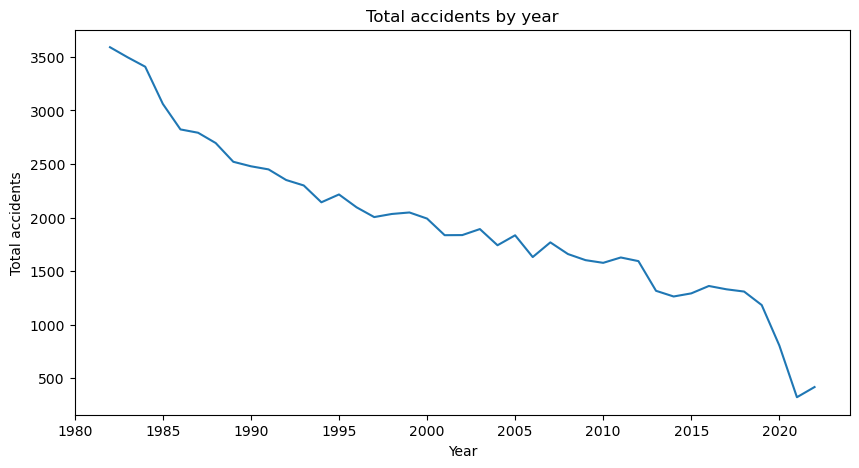

In [501]:
fig, ax = plt.subplots(figsize= (10,5))
ax.plot(accidents_year['Year'], accidents_year['Number of Accidents'])
ax.set_title('Total accidents by year')
ax.set_xlabel('Year')
ax.set_ylabel('Total accidents')
;

### Multivariate Analysis

<Axes: >

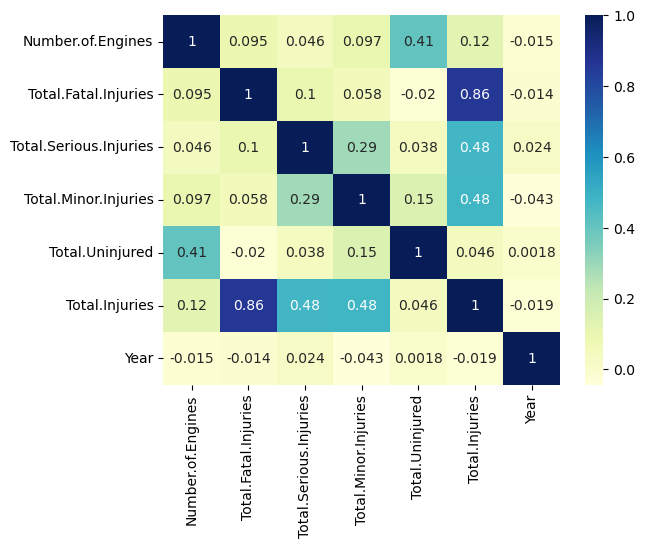

In [505]:
numerical_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
#Plotting the Heatmap
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);


## reccomandations

## Conclusions

In [ ]:
df.to_csv('AvaitionDataClean.xlsx', index=False)